In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv("/Users/ChandlerShortlidge/Downloads/amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [13]:
frequency_table = df['category'].value_counts()

# Calculating the proportion of each unique value in the 'MSZoning'
proportion_table = df['category'].value_counts(normalize=True)

display(frequency_table)
frequency_table.head(5) 
display(proportion_table)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
                                            ...   
Alexa Built-In Devices                    0.000044
Motorbike Chassis                         0.000044
Plugs                                     0.000044
Smart Home Security & Lighting            0.000043
Smart Speakers                            0.000022
Name: proportion, Length: 296, dtype: float64

*Top 5 product categories are Sports & Outdoors; Beauty; Handmade Clothing, Shoes & Accessories; Bath & Body; and Birthday Gifts*

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*


/var/folders/2n/c95ntf5d1wx1_vrd1b3ljbkw0000gn/T/ipykernel_22236/3521792655.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='category', order=top_cats.index, palette="viridis")


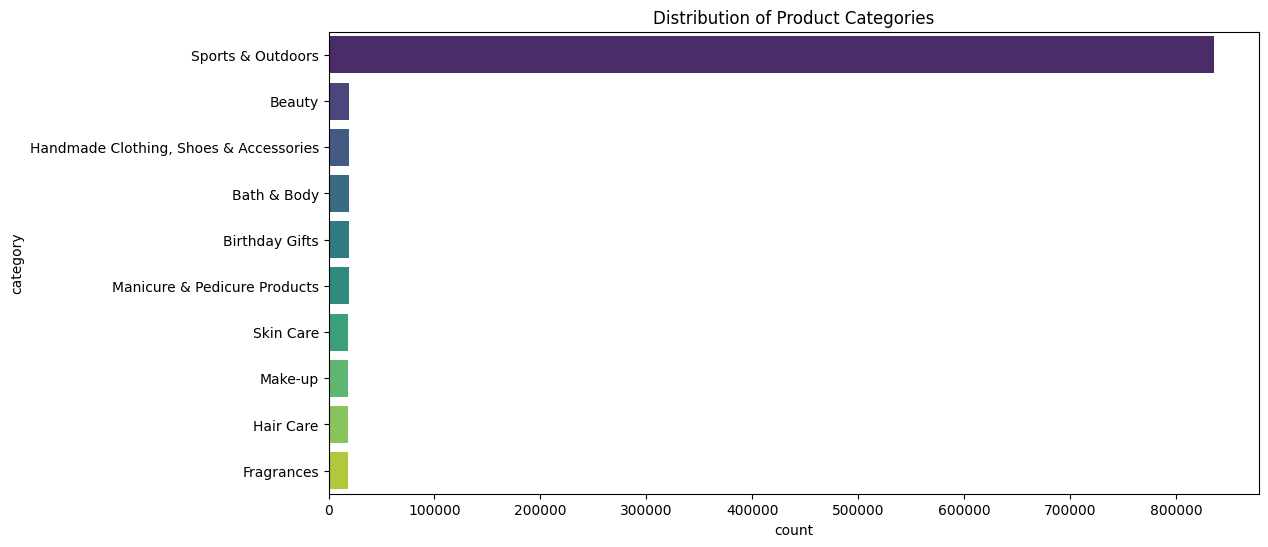

In [22]:

top_cats = frequency_table.head(10) 

# Bar chart
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='category', order=top_cats.index, palette="viridis")
plt.title('Distribution of Product Categories')
plt.show()

/var/folders/2n/c95ntf5d1wx1_vrd1b3ljbkw0000gn/T/ipykernel_22236/2574313031.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="Set3")


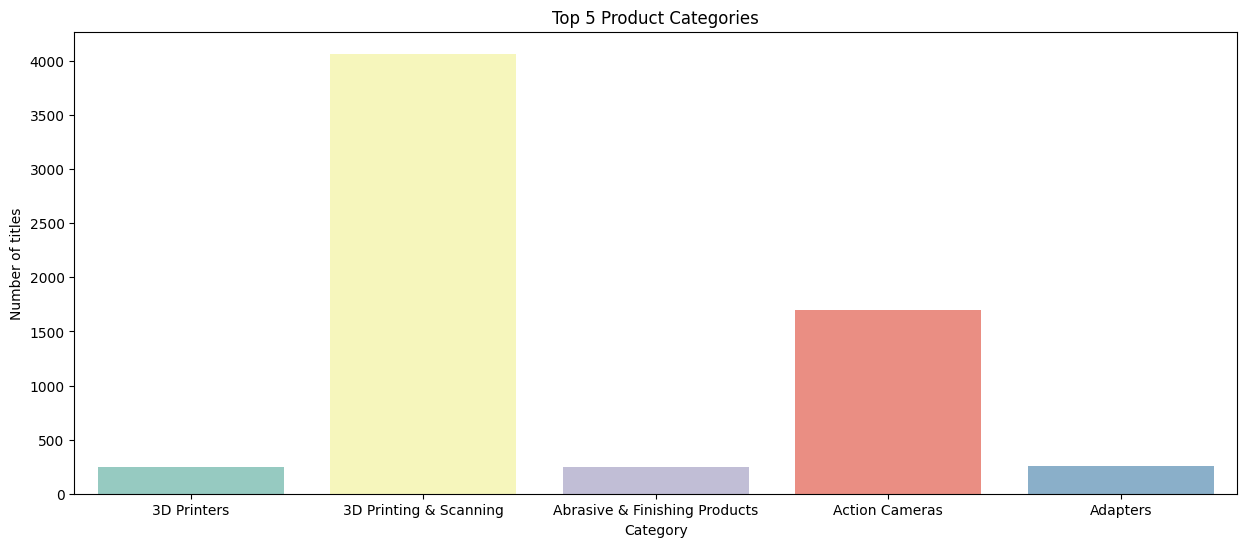

In [20]:
top_products = df.groupby('category')['title'].count().head()
top_products


plt.figure(figsize=(15, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette="Set3")
plt.title("Top 5 Product Categories")
plt.ylabel("Number of titles")
plt.xlabel("Category")
plt.show()


  - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

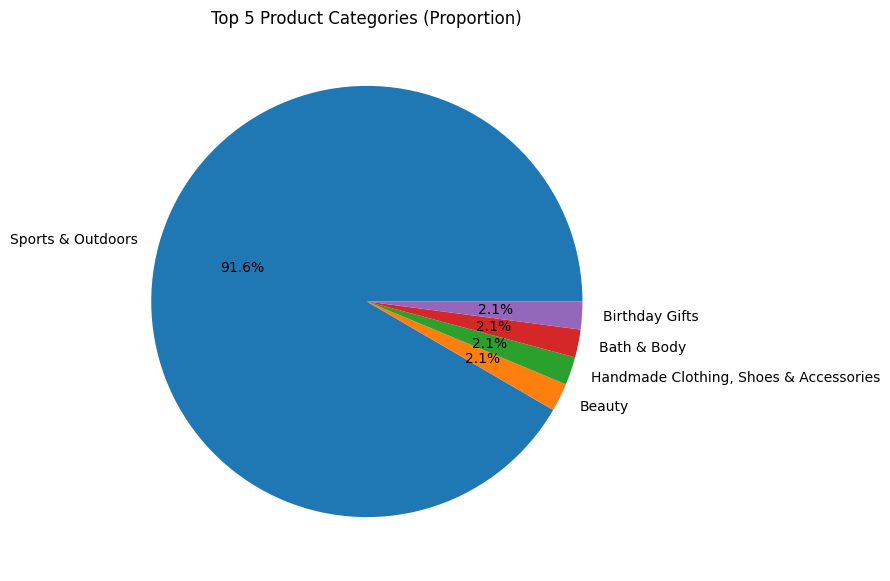

In [19]:
# Pie chart
top_cats.plot.pie(
    autopct='%1.1f%%',     # Show percent v
    ylabel='',             # Remove y-label for a cleaner plot
    figsize=(7, 7)         
)
plt.title("Top 5 Product Categories (Proportion)")
plt.show()


*Sports & Outdoors dominates the listings*

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [42]:
df.price.describe()

count    2.443651e+06
mean     8.924381e+01
std      5.115909e-13
min      8.924381e+01
25%      8.924381e+01
50%      8.924381e+01
75%      8.924381e+01
max      8.924381e+01
Name: price, dtype: float64

In [41]:
mean_val = df["price"].mean()
median_val = df["price"].median()
mode_val = df["price"].mode()[0]  

print("Mean Price:")
print(mean_val)

print("Median Price:")
print(median_val)

print("Mode Price:")
print(mode_val)

Mean Price:
89.24380943923714
Median Price:
89.24380943923663
Mode Price:
89.24380943923663


*The average (mean) price point is 89.24, which is exactly the same as the mode, as well as the median.*

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [50]:
print("Variance:")
print(df.price.var())

print("Standard Deviation:")
print(df.price.std())

min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
print("Range of prices:")
print(range_price)

Variance:
2.6172522279478076e-25
Standard Deviation:
5.115908744248482e-13
Range of prices:
0.0


*The product prices are not varied at all. There is no spread in prices.*